## Avacado

The avocado, a tree likely originating from south-central Mexico, is classified as a member of the flowering plant family Lauraceae. The fruit of the plant, also called an avocado, is botanically a large berry containing a single large seed.

The goal is to predict the average price which is continuous in nature of the different type of avocado and using the region that in which region they are lying.

### Importing Liberaries

In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC,SVR
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import zscore

In [20]:
df = pd.read_csv("E:/Study/Avacado.csv")
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,12/27/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,12/20/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,12/13/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,12/6/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,11/29/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2/4/2018,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,1/28/2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,1/21/2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,1/14/2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [21]:
df.shape

(18249, 14)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [23]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [24]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

<AxesSubplot:>

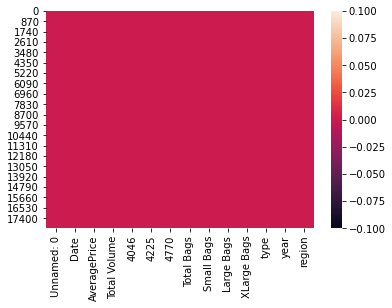

In [25]:
sns.heatmap(df.isnull())

In [26]:
df.drop(columns ='Unnamed: 0', inplace=True)

In [27]:
df.shape

(18249, 13)

In [30]:
df['XLarge Bags'].nunique()

5588

In [32]:
df['type'].unique()

array(['conventional', 'organic'], dtype=object)

In [33]:
df['region'].nunique()

54

In [35]:
df['Date'].nunique()

169

In [45]:
## Checking the count of Avacado sold in each year based on the type
df.groupby('year')['type'].value_counts()

year  type        
2015  conventional    2808
      organic         2807
2016  conventional    2808
      organic         2808
2017  conventional    2862
      organic         2860
2018  conventional     648
      organic          648
Name: type, dtype: int64

In [46]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


Above statistics data show that their multiple outliers mostly in XLargeBags 

There is also difference between mean and 50% value in some of the columns which used to get fix for better prediction

Also, number of rows in each column are same, means there are no null values in the data set.

Also, the mean and 50%value of most of the column are same and the STD and mean are very close to each other.

Most of the column statistics data are near to 0 values.

By checking the difference between the 75% and max value there are outliers in some of the column, I will check it soon.

### Data Visualization

<AxesSubplot:>

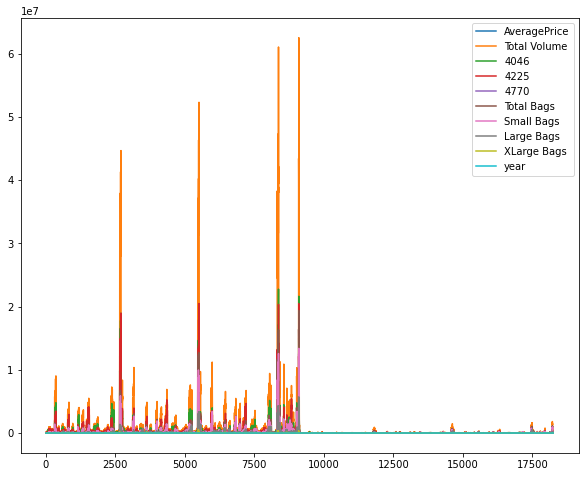

In [51]:
df.plot.line(figsize=(10,8))

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

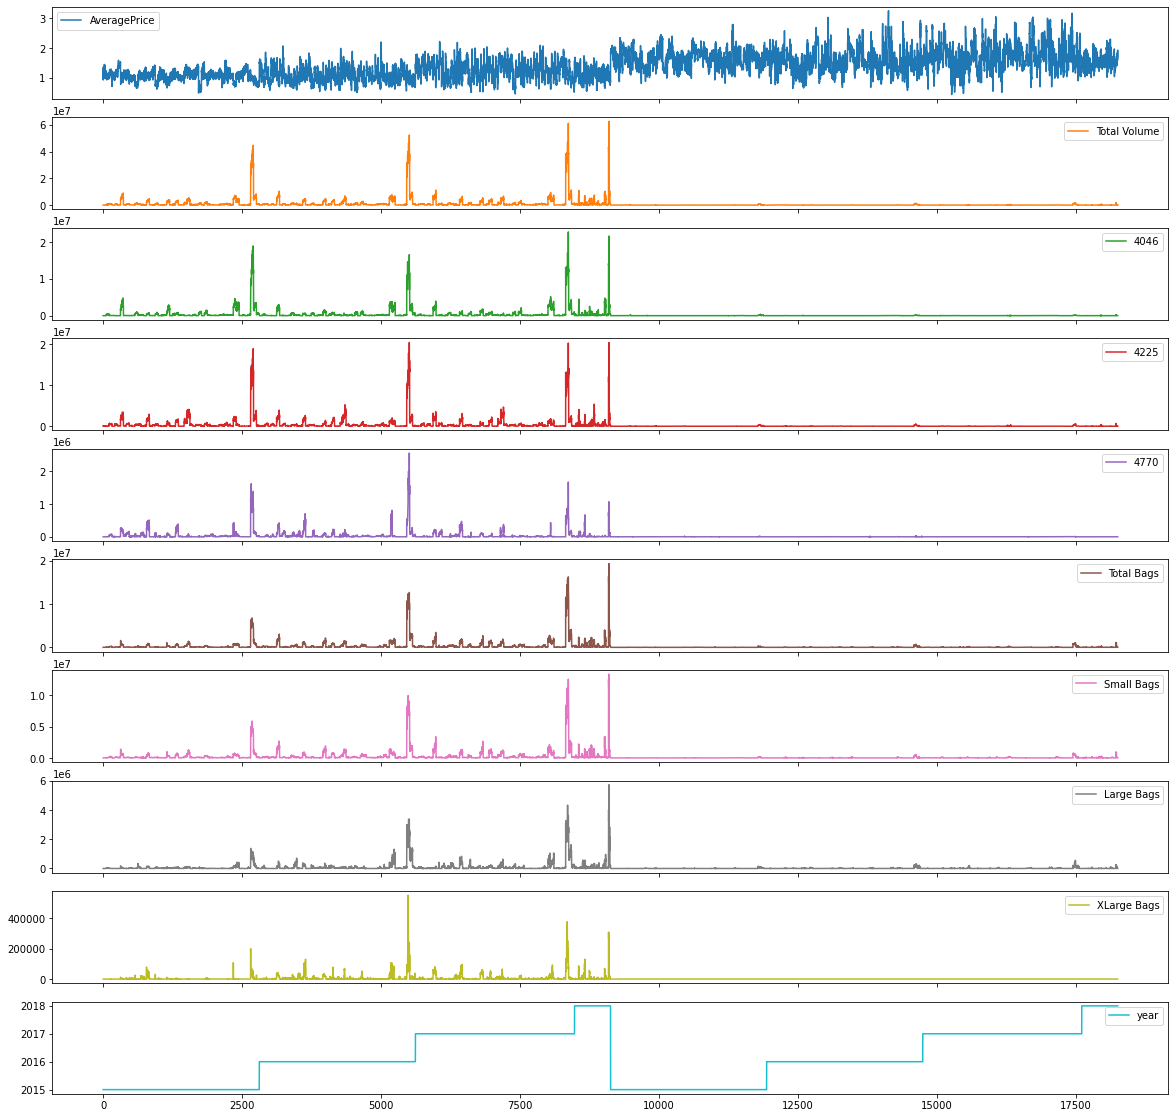

In [48]:
df.plot.line(subplots = True, figsize=(20,20))

In this portion we can plot different graph using different columns and try to visualize the data using matplotlib and seaborn library.

We use different graph include:

Bar plot

Count plot

Line plot

Histogram and Pair plot


<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

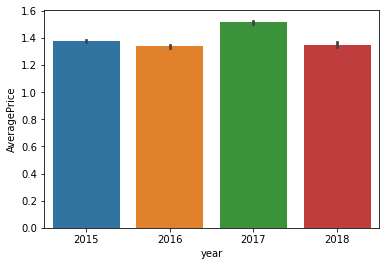

In [57]:
## checking which year has max average price
sns.barplot(x='year',y='AveragePrice',data=df)

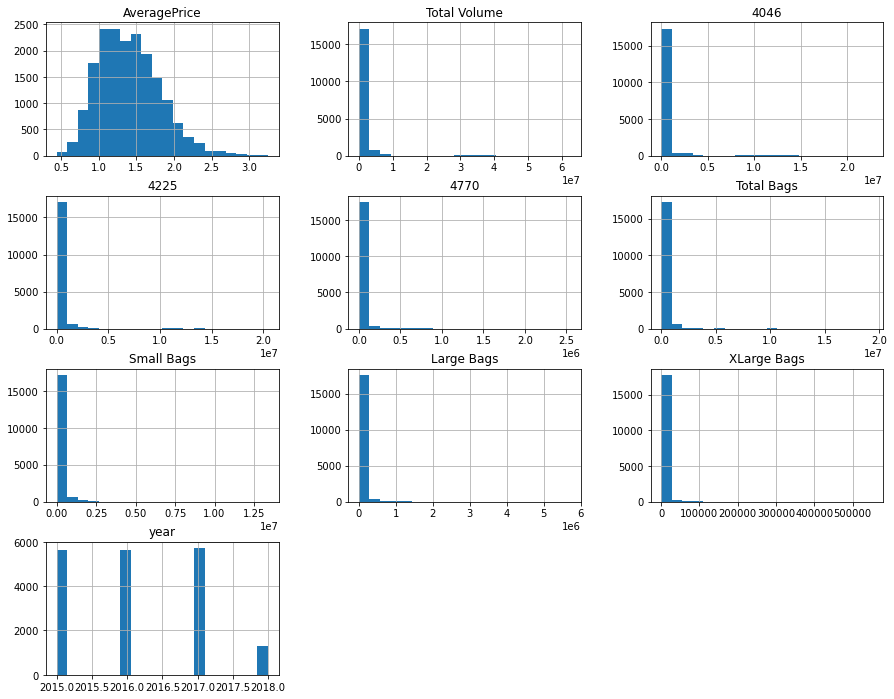

In [52]:
df.hist(bins=20,figsize=(15,12))
plt.show()

Average price column is normally distributing over the histogram.

Rest of the data are not much varying in term of numbers, so they are almost left skewed data

To make the column as normal distributed we can use different methods, but I am using numPy log to make the skew values as normal distributed.


In [68]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
dtype: float64

AveragePrice        AxesSubplot(0.125,0.71587;0.133621x0.16413)
Total Volume     AxesSubplot(0.285345,0.71587;0.133621x0.16413)
4046              AxesSubplot(0.44569,0.71587;0.133621x0.16413)
4225             AxesSubplot(0.606034,0.71587;0.133621x0.16413)
4770             AxesSubplot(0.766379,0.71587;0.133621x0.16413)
Total Bags         AxesSubplot(0.125,0.518913;0.133621x0.16413)
Small Bags      AxesSubplot(0.285345,0.518913;0.133621x0.16413)
Large Bags       AxesSubplot(0.44569,0.518913;0.133621x0.16413)
XLarge Bags     AxesSubplot(0.606034,0.518913;0.133621x0.16413)
year            AxesSubplot(0.766379,0.518913;0.133621x0.16413)
dtype: object

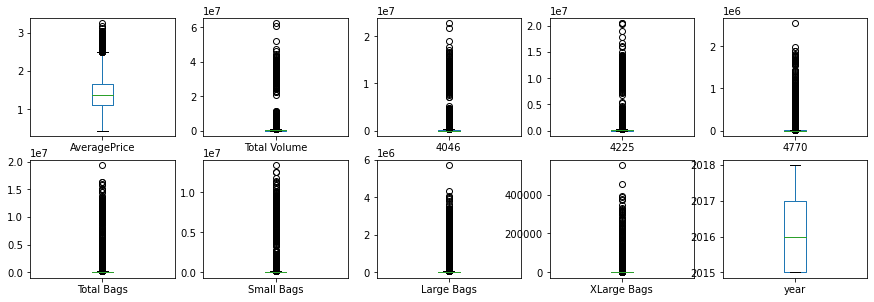

In [69]:
df.plot(kind='box',subplots=True,layout=(4,5),figsize=(15,10))

In [72]:
#separating the target column from the independent features
x=df.drop('AveragePrice',axis=1)
y=df['AveragePrice']

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [74]:
#encoding the region column using label encoder
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le=LabelEncoder()
df['region']=le.fit_transform(df['region'])

In [75]:
df['type']=le.fit_transform(df['type'])

<AxesSubplot:>

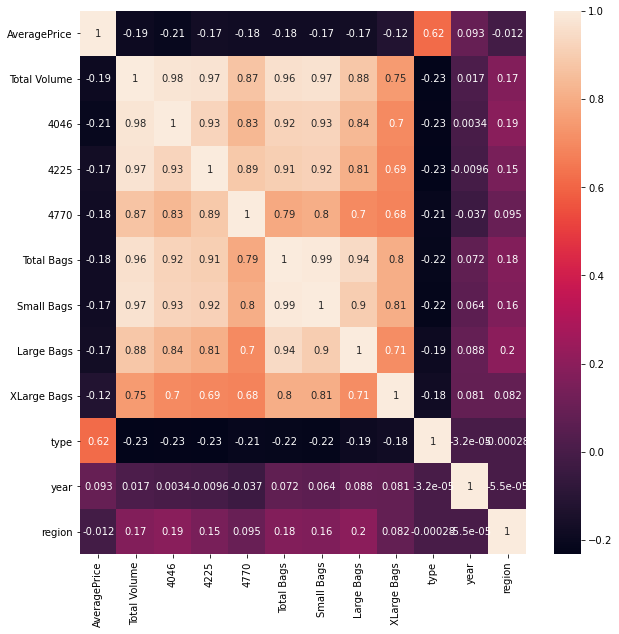

In [76]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

Almost all the columns show signs of multicollinearity Further investigation on the same

In [77]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [78]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif['Variables']=x.columns
    vif['VIF factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return vif

In [79]:
df_n=df.drop('Date',axis=1)

In [80]:
df_n=df_n.drop('region',axis=1)

In [81]:
df_n=df_n.drop('type',axis=1)

In [82]:
print(calc_vif(df_n))

      Variables    VIF factor
0  AveragePrice  1.391351e+01
1  Total Volume  5.204945e+09
2          4046  6.937023e+08
3          4225  6.323877e+08
4          4770  4.966241e+06
5    Total Bags  2.502000e+14
6    Small Bags  1.429714e+14
7    Large Bags  1.521486e+13
8   XLarge Bags  7.855161e+10
9          year  1.424078e+01


<AxesSubplot:>

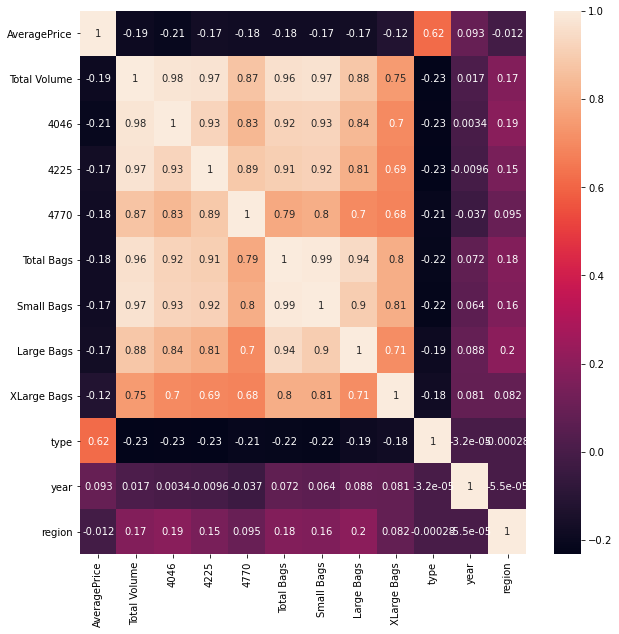

In [83]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

The columns small bags,Large Bags,XLarge Bags are highly colinear with the total bags as they are being explained by the total bags columns itself,hence dropping them should.not have a significant effect on the model performance

In [84]:
df.drop('Total Bags',axis=1,inplace=True)
#df.drop('Large Bags',axis=1,inplace=True)
#df.drop('XLarge Bags',axis=1,inplace=True)
#df.head()

The features 4046,4225,4770 show high colinearity with total volume as they are being explained by the feature already.

In [85]:
df.drop('Total Volume',axis=1,inplace=True)
#df.drop('4225',axis=1,inplace=True)
#df.drop('4770',axis=1,inplace=True)
#df.head()

In [86]:
df['year'].nunique()

4

In [87]:
df['year']=le.fit_transform(df['year'])
df['year'].unique()

array([0, 1, 2, 3], dtype=int64)

In [88]:
#since we already have the year column,the date column is not significant 
df.drop('Date',axis=1,inplace=True)

In [89]:
x1=df.drop('AveragePrice',axis=1)
y1=df['AveragePrice']
df.head()

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,1036.74,54454.85,48.16,8603.62,93.25,0.0,0,0,0
1,1.35,674.28,44638.81,58.33,9408.07,97.49,0.0,0,0,0
2,0.93,794.70,109149.67,130.50,8042.21,103.14,0.0,0,0,0
3,1.08,1132.00,71976.41,72.58,5677.40,133.76,0.0,0,0,0
4,1.28,941.48,43838.39,75.78,5986.26,197.69,0.0,0,0,0


### REGRESSION (AVERAGE PRICE PREDICTION)

#### EDA

In [90]:
calc_vif(x1)

,Variables,VIF factor
0,4046,10.628848
1,4225,14.077990
2,4770,5.595269
3,Small Bags,20.647290
4,Large Bags,5.833962
5,XLarge Bags,3.517597
6,type,1.785626
7,year,1.979974
8,region,2.371146


In [91]:
df.describe()

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,2.930084e+05,2.951546e+05,2.283974e+04,1.821947e+05,5.433809e+04,3106.426507,0.499918,1.147899,26.495644
std,0.402677,1.264989e+06,1.204120e+06,1.074641e+05,7.461785e+05,2.439660e+05,17692.894652,0.500014,0.939938,15.583788
min,0.440000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.100000,8.540700e+02,3.008780e+03,0.000000e+00,2.849420e+03,1.274700e+02,0.000000,0.000000,0.000000,13.000000
50%,1.370000,8.645300e+03,2.906102e+04,1.849900e+02,2.636282e+04,2.647710e+03,0.000000,0.000000,1.000000,26.000000
75%,1.660000,1.110202e+05,1.502069e+05,6.243420e+03,8.333767e+04,2.202925e+04,132.500000,1.000000,2.000000,40.000000
max,3.250000,2.274362e+07,2.047057e+07,2.546439e+06,1.338459e+07,5.719097e+06,551693.650000,1.000000,3.000000,53.000000


In [92]:
df.skew()

AveragePrice     0.580303
4046             8.648220
4225             8.942466
4770            10.159396
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
dtype: float64

<AxesSubplot:>

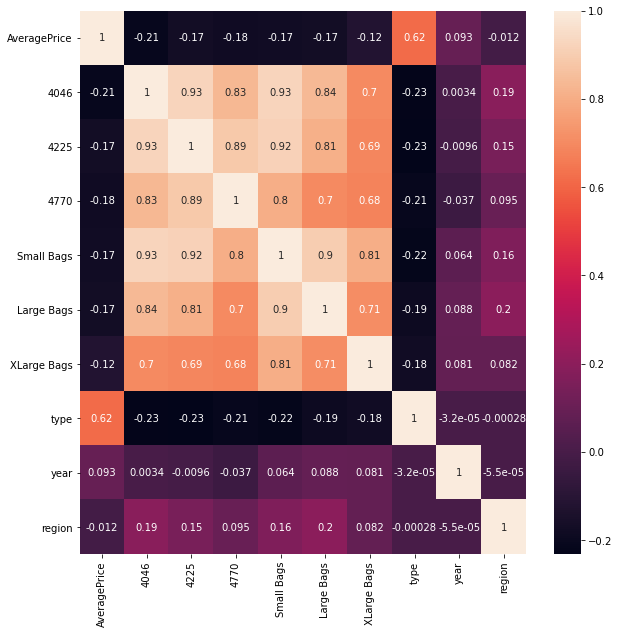

In [93]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [94]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
sc.fit(df)
sc_scale=sc.transform(df)


spca=pd.DataFrame(data=sc_scale)
spca

,0,1,2,3,4,5,6,7,8,9
0,-0.188689,-0.230816,-0.199902,-0.212091,-0.232647,-0.222352,-0.17558,-0.999836,-1.221282,-1.700252
1,-0.139020,-0.231103,-0.208054,-0.211997,-0.231568,-0.222335,-0.17558,-0.999836,-1.221282,-1.700252
2,-1.182069,-0.231007,-0.154478,-0.211325,-0.233399,-0.222311,-0.17558,-0.999836,-1.221282,-1.700252
3,-0.809551,-0.230741,-0.185350,-0.211864,-0.236568,-0.222186,-0.17558,-0.999836,-1.221282,-1.700252
4,-0.312861,-0.230891,-0.208719,-0.211834,-0.236154,-0.221924,-0.17558,-0.999836,-1.221282,-1.700252
...,...,...,...,...,...,...,...,...,...,...
18244,0.556347,-0.230017,-0.243857,-0.212540,-0.226665,-0.220964,-0.17558,1.000164,1.970504,1.700811
18245,0.755023,-0.230693,-0.242277,-0.212540,-0.232196,-0.221403,-0.17558,1.000164,1.970504,1.700811
18246,1.152375,-0.230693,-0.243090,-0.205766,-0.231644,-0.222561,-0.17558,1.000164,1.970504,1.700811
18247,1.301382,-0.230428,-0.242651,-0.205774,-0.229543,-0.222529,-0.17558,1.000164,1.970504,1.700811


In [95]:
from sklearn.decomposition import PCA

x2=sc_scale[:,1:]
y2=sc_scale[:,0]
pca_=PCA(n_components=3)
pca_.fit(x2)
x2_pca=pca_.transform(x2)
s_pca=pd.DataFrame(data=x2_pca)
s_pca

,0,1,2
0,-0.561300,-1.744874,1.469624
1,-0.564331,-1.744277,1.469666
2,-0.542351,-1.748062,1.469520
3,-0.556696,-1.746035,1.469564
4,-0.566259,-1.744408,1.469630
...,...,...,...
18244,-0.470672,2.442725,-1.238460
18245,-0.472838,2.442368,-1.238437
18246,-0.470755,2.441556,-1.238176
18247,-0.469551,2.441608,-1.238183


In [96]:
x=df.drop('AveragePrice',axis=1)
y=df['AveragePrice']
y

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 18249, dtype: float64

### MACHINE LEARNING PHASE

In [97]:
x_train,x_test,y_train,y_test=train_test_split(x2,y2,test_size=.33,random_state=101)

In [98]:
x_test.shape

(6023, 9)

In [100]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge

lr=LinearRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)
print('score: ',lr.score(x_train,y_train))
print("mean_squared error: ",mean_squared_error(y_test,pred_lr))
print("mean_absolute_error: ",mean_absolute_error(y_test,pred_lr))
print("r2 score: ",r2_score(y_test,pred_lr))

score:  0.4133744987303022
mean_squared error:  0.610741326037722
mean_absolute_error:  0.5964590795586606
r2 score:  0.3928461983342767


Linear Regression Model performed Poorly

In [101]:
len(x_train)

12226

#### L1 and L2 REGULARIZATION

In [102]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet

#### LASSO

In [103]:
#LASSO
ls=Lasso(alpha=0.0001)
ls.fit(x_train,y_train)
pred_ls=ls.predict(x_test)
print("score: ",ls.score(x_train,y_train))

score:  0.4133737868506858


In [104]:
print("mean_squared error: ",mean_squared_error(y_test,pred_ls))
print("mean_absolute_error: ",mean_absolute_error(y_test,pred_ls))
print("r2 score: ",r2_score(y_test,pred_ls))

mean_squared error:  0.610729480443956
mean_absolute_error:  0.5964384171550219
r2 score:  0.3928579743464464


#### Ridge

In [105]:
#RIDGE
rg=Ridge(alpha=0.0001)
rg.fit(x_train,y_train)
pred_rg=rg.predict(x_test)
print("score: ",rg.score(x_train,y_train))
print("mean_squared error: ",mean_squared_error(y_test,pred_rg))
print("mean_absolute_error: ",mean_absolute_error(y_test,pred_rg))
print("r2 score: ",r2_score(y_test,pred_rg))

score:  0.41337449873030196
mean_squared error:  0.6107413255289686
mean_absolute_error:  0.5964590789688443
r2 score:  0.39284619884004157


In [106]:
#### KNeighbors Regressor

In [107]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor(n_neighbors=5)
knr.fit(x_train,y_train)
pred_knr=knr.predict(x_test)
print("score : ",knr.score(x_train,y_train))
print("mean_squared error: ",mean_squared_error(y_test,pred_knr))
print("mean_absolute_error: ",mean_absolute_error(y_test,pred_knr))
print("r2 score: ",r2_score(y_test,pred_knr))

score :  0.9007387652170249
mean_squared error:  0.17261602808417692
mean_absolute_error:  0.2860326685613697
r2 score:  0.8283979268937303


#### Decision Tree Regressor

In [108]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr=dtr.predict(x_test)
print("score : ",dtr.score(x_train,y_train))
print("mean_squared error: ",mean_squared_error(y_test,pred_dtr))
print("mean_absolute_error: ",mean_absolute_error(y_test,pred_dtr))
print("r2 score: ",r2_score(y_test,pred_dtr))

score :  1.0
mean_squared error:  0.33006625812122276
mean_absolute_error:  0.37932514793054894
r2 score:  0.6718725671963081


#### USING GRID SEARCH

In [111]:
#SVR
svr1=SVR(gamma='auto')
paramgrid={'kernel':['rbf','poly','linear']}

grid=GridSearchCV(svr1,paramgrid,cv=5)
grid.fit(x_train,y_train)
print(grid.best_score_)

print(grid.best_params_)

0.5093916282367487
{'kernel': 'rbf'}


In [112]:
for i in range(1,10):
    
    knr=KNeighborsRegressor(n_neighbors=i)
    knr.fit(x_train,y_train)
    pred_knr=knr.predict(x_test)
    print('iteration:',i)
    print("score : ",knr.score(x_train,y_train))
    print("mean_squared error: ",mean_squared_error(y_test,pred_knr))
    print("mean_absolute_error: ",mean_absolute_error(y_test,pred_knr))
    print("r2 score: ",r2_score(y_test,pred_knr))

iteration: 1
score :  1.0
mean_squared error:  0.22066273391068986
mean_absolute_error:  0.30180750823866753
r2 score:  0.7806334497633908
iteration: 2
score :  0.9499559944965197
mean_squared error:  0.17604746007022987
mean_absolute_error:  0.2810694779817358
r2 score:  0.8249866513067222
iteration: 3
score :  0.9287911668102506
mean_squared error:  0.1683682725442101
mean_absolute_error:  0.27951568912230895
r2 score:  0.8326207309102349
iteration: 4
score :  0.9138834793505309
mean_squared error:  0.1673428735614936
mean_absolute_error:  0.2811179265065432
r2 score:  0.8336401066492561
iteration: 5
score :  0.9007387652170249
mean_squared error:  0.17261602808417692
mean_absolute_error:  0.2860326685613697
r2 score:  0.8283979268937303
iteration: 6
score :  0.8909257672652293
mean_squared error:  0.1763158494129241
mean_absolute_error:  0.2917418977017262
r2 score:  0.8247198384961326
iteration: 7
score :  0.882185120807042
mean_squared error:  0.18164321507094341
mean_absolute_err

In [113]:
knr=KNeighborsRegressor(n_neighbors=2)
knr.fit(x_train,y_train)
pred_knr=knr.predict(x_test)

print("score : ",knr.score(x_train,y_train))
print("mean_squared error: ",mean_squared_error(y_test,pred_knr))
print("mean_absolute_error: ",mean_absolute_error(y_test,pred_knr))
print("r2 score: ",r2_score(y_test,pred_knr))

score :  0.9499559944965197
mean_squared error:  0.17604746007022987
mean_absolute_error:  0.2810694779817358
r2 score:  0.8249866513067222


In [114]:
#random forest regressor
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(max_depth=2,random_state=42)
rf.fit(x_train,y_train)
pred_rf=rf.predict(x_test)

print("score : ",rf.score(x_train,y_train))
print("mean_squared error: ",mean_squared_error(y_test,pred_rf))
print("mean_absolute_error: ",mean_absolute_error(y_test,pred_rf))
print("r2 score: ",r2_score(y_test,pred_rf))

score :  0.4521283324117258
mean_squared error:  0.5650665283130113
mean_absolute_error:  0.5803567596678213
r2 score:  0.4382527000668256


THE KNEIGHBORS REGRESSOR PERFORMED THE BEST with n-neighbors as 2 and 3

In [132]:
import pickle
filename='avocado.pkl'
pickle.dump(svr1,open(filename,'wb'))

reloading the model

In [133]:
load_model=pickle.load(open(filename,'rb'))

CLASSIFICATION APPROACH(PREDICTING THE REGION)

In [135]:
df

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,1036.74,54454.85,48.16,8603.62,93.25,0.0,0,0,0
1,1.35,674.28,44638.81,58.33,9408.07,97.49,0.0,0,0,0
2,0.93,794.70,109149.67,130.50,8042.21,103.14,0.0,0,0,0
3,1.08,1132.00,71976.41,72.58,5677.40,133.76,0.0,0,0,0
4,1.28,941.48,43838.39,75.78,5986.26,197.69,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
18244,1.63,2046.96,1529.20,0.00,13066.82,431.85,0.0,1,3,53
18245,1.71,1191.70,3431.50,0.00,8940.04,324.80,0.0,1,3,53
18246,1.87,1191.92,2452.79,727.94,9351.80,42.31,0.0,1,3,53
18247,1.93,1527.63,2981.04,727.01,10919.54,50.00,0.0,1,3,53


In [136]:
df2=pd.DataFrame(df)
df2.head()

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,1036.74,54454.85,48.16,8603.62,93.25,0.0,0,0,0
1,1.35,674.28,44638.81,58.33,9408.07,97.49,0.0,0,0,0
2,0.93,794.70,109149.67,130.50,8042.21,103.14,0.0,0,0,0
3,1.08,1132.00,71976.41,72.58,5677.40,133.76,0.0,0,0,0
4,1.28,941.48,43838.39,75.78,5986.26,197.69,0.0,0,0,0


In [139]:
list=['type','year','region']
for i in list:
    df2[i]=le.fit_transform(df2[i])
df2[i].nunique()

54

In [140]:
x=df2.drop('region',axis=1)
y=df2['region']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [141]:
y.shape

(18249,)

#### Logistic Regression

In [142]:
#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score
lg=LogisticRegression()

In [144]:
lg.fit(x_train,y_train)
pred_lg=lg.predict(x_test)
print('accuracy_score:',accuracy_score(y_test,pred_lg))
print("confusion matrix:",confusion_matrix(y_test,pred_lg))
print("classification report:",classification_report(y_test,pred_lg))

accuracy_score: 0.16353976423709116
confusion matrix: [[ 0  0  1 ...  0  0  0]
 [ 0  4  0 ...  2  4  0]
 [ 0  0 39 ...  0  0  0]
 ...
 [ 0  0  0 ... 73  0  0]
 [ 0  0  0 ... 16 49  0]
 [ 0  0  2 ...  2  9 11]]
classification report:               precision    recall  f1-score   support

           0       0.00      0.00      0.00       106
           1       0.09      0.04      0.05       112
           2       0.33      0.36      0.35       107
           3       0.00      0.00      0.00       108
           4       0.18      0.15      0.16       114
           5       0.00      0.00      0.00       117
           6       0.11      0.38      0.17       108
           7       0.00      0.00      0.00       122
           8       0.77      0.42      0.54       115
           9       0.14      0.61      0.23       123
          10       0.00      0.00      0.00       120
          11       0.00      0.00      0.00       118
          12       0.21      0.53      0.30       105
          

In [146]:
from sklearn.tree import DecisionTreeClassifier
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)
dtc= DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred_dtc=dtc.predict(x_test)
print('accuracy_score:',accuracy_score(y_test,pred_dtc))
print("confusion matrix:",confusion_matrix(y_test,pred_dtc))
print("classification report:",classification_report(y_test,pred_dtc))

accuracy_score: 0.7919641374730201
confusion matrix: [[ 87   0   0 ...   0   0   0]
 [  0  81   0 ...   0   0   5]
 [  0   0  95 ...   0   0   3]
 ...
 [  0   0   0 ... 110   0   0]
 [  0   0   0 ...   0  97   0]
 [  0   0   3 ...   0   0  71]]
classification report:               precision    recall  f1-score   support

           0       0.74      0.82      0.78       106
           1       0.68      0.72      0.70       112
           2       0.81      0.89      0.85       107
           3       0.76      0.78      0.77       108
           4       0.81      0.85      0.83       114
           5       0.76      0.69      0.73       117
           6       0.97      0.94      0.96       108
           7       0.81      0.79      0.80       122
           8       0.91      0.91      0.91       115
           9       0.79      0.77      0.78       123
          10       0.73      0.68      0.70       120
          11       0.84      0.81      0.83       118
          12       0.87      

In [147]:
#randomforestclassifier
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=42)
rfc.fit(x_train,y_train)
pred_rfc=rfc.predict(x_test)
print('accuracy_score:',accuracy_score(y_test,pred_rfc))
print("confusion matrix:",confusion_matrix(y_test,pred_rfc))
print("classification report:",classification_report(y_test,pred_rfc))

accuracy_score: 0.8698323094803254
confusion matrix: [[ 96   0   0 ...   0   0   0]
 [  0  94   0 ...   0   0   2]
 [  0   0 103 ...   0   0   0]
 ...
 [  0   0   0 ... 110   0   0]
 [  0   0   0 ...   0  97   0]
 [  0   2   2 ...   0   0  77]]
classification report:               precision    recall  f1-score   support

           0       0.83      0.91      0.86       106
           1       0.75      0.84      0.79       112
           2       0.90      0.96      0.93       107
           3       0.84      0.80      0.82       108
           4       0.89      0.96      0.93       114
           5       0.82      0.76      0.79       117
           6       0.96      0.99      0.97       108
           7       0.86      0.88      0.87       122
           8       0.97      0.96      0.96       115
           9       0.91      0.89      0.90       123
          10       0.78      0.77      0.77       120
          11       0.90      0.89      0.89       118
          12       0.89      

In [148]:
#kneighborsclassifiers
from sklearn.neighbors import KNeighborsClassifier
x_train,x_test,y_train,y_test=train_test_split(spca,y,test_size=.33,random_state=42)

In [149]:
knc=KNeighborsClassifier(n_neighbors=2)
knc.fit(x_train,y_train)
pred_knc=knc.predict(x_test)
print('accuracy_score:',accuracy_score(y_test,pred_knc))
print("confusion matrix:",confusion_matrix(y_test,pred_knc))
print("classification report:",classification_report(y_test,pred_knc))

accuracy_score: 0.881620454922796
confusion matrix: [[106   0   0 ...   0   0   0]
 [  8 101   3 ...   0   0   0]
 [  1   4  99 ...   0   0   0]
 ...
 [  0   0   0 ... 110   0   0]
 [  0   0   0 ...   0  99   1]
 [  0   0   0 ...   0   2 101]]
classification report:               precision    recall  f1-score   support

           0       0.92      1.00      0.96       106
           1       0.94      0.90      0.92       112
           2       0.82      0.93      0.87       107
           3       0.88      0.82      0.85       108
           4       0.86      0.86      0.86       114
           5       0.93      0.88      0.90       117
           6       0.94      0.97      0.95       108
           7       0.95      0.89      0.92       122
           8       0.89      0.95      0.92       115
           9       0.83      0.89      0.86       123
          10       0.88      0.83      0.85       120
          11       0.89      0.88      0.89       118
          12       0.78      0

In [150]:
#support vector classifier
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)
from sklearn.svm import SVC
svc2=SVC()
svc2.fit(x_train,y_train)
pred_svc2=svc2.predict(x_test)
print('accuracy_score:',accuracy_score(y_test,pred_svc2))
print("confusion matrix:",confusion_matrix(y_test,pred_svc2))
print("classification report:",classification_report(y_test,pred_svc2))

accuracy_score: 0.200398472521999
confusion matrix: [[ 0  0  0 ...  0  0  0]
 [ 0 36  0 ...  0  0 14]
 [ 0  0 57 ...  0  0  0]
 ...
 [ 0  0  0 ... 89  0  0]
 [ 0  0  0 ...  1 50  0]
 [ 0  3  0 ...  0  0 40]]
classification report:               precision    recall  f1-score   support

           0       0.00      0.00      0.00       106
           1       0.23      0.32      0.27       112
           2       0.59      0.53      0.56       107
           3       0.00      0.00      0.00       108
           4       0.42      0.34      0.38       114
           5       0.00      0.00      0.00       117
           6       0.90      0.35      0.51       108
           7       0.00      0.00      0.00       122
           8       0.91      0.43      0.59       115
           9       0.00      0.00      0.00       123
          10       0.00      0.00      0.00       120
          11       0.78      0.25      0.37       118
          12       0.75      0.40      0.52       105
          13

random forest classifier performed the best with 87% accuracy

In [151]:
import pickle
filename='avocado(region).pkl'
pickle.dump(rfc,open(filename,'wb'))

In [152]:
load_model=pickle.load(open(filename,'rb'))
result=load_model.score(x_train,y_train)
result

0.9972190413872076